<a href="https://colab.research.google.com/github/mohsina680/DS-Practice-Projects/blob/main/F1_2025_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 All libraries imported successfully
 F1 CHAMPIONSHIP PREDICTION 2025
 Tasks: Data Cleaning, EDA, Feature Engineering, Model Training
 Objective: Predict 2025 F1 Champion using ML models
 Models: Logistic Regression, Random Forest, KNN, Naive Bayes
/content/f1_pitstops_2018_2024.csv
 Dataset created successfully: (5000, 13)

 DATA CLEANING AND PREPROCESSING
 No missing values found!
 Shape before cleaning: (5000, 13)
 Shape after cleaning: (5000, 13)

 EXPLORATORY DATA ANALYSIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   driver                      5000 non-null   object 
 1   team                        5000 non-null   object 
 2   year                        5000 non-null   int64  
 3   points                      5000 non-null   float64
 4   position                    5000 non-null   int64  
 5   aggres

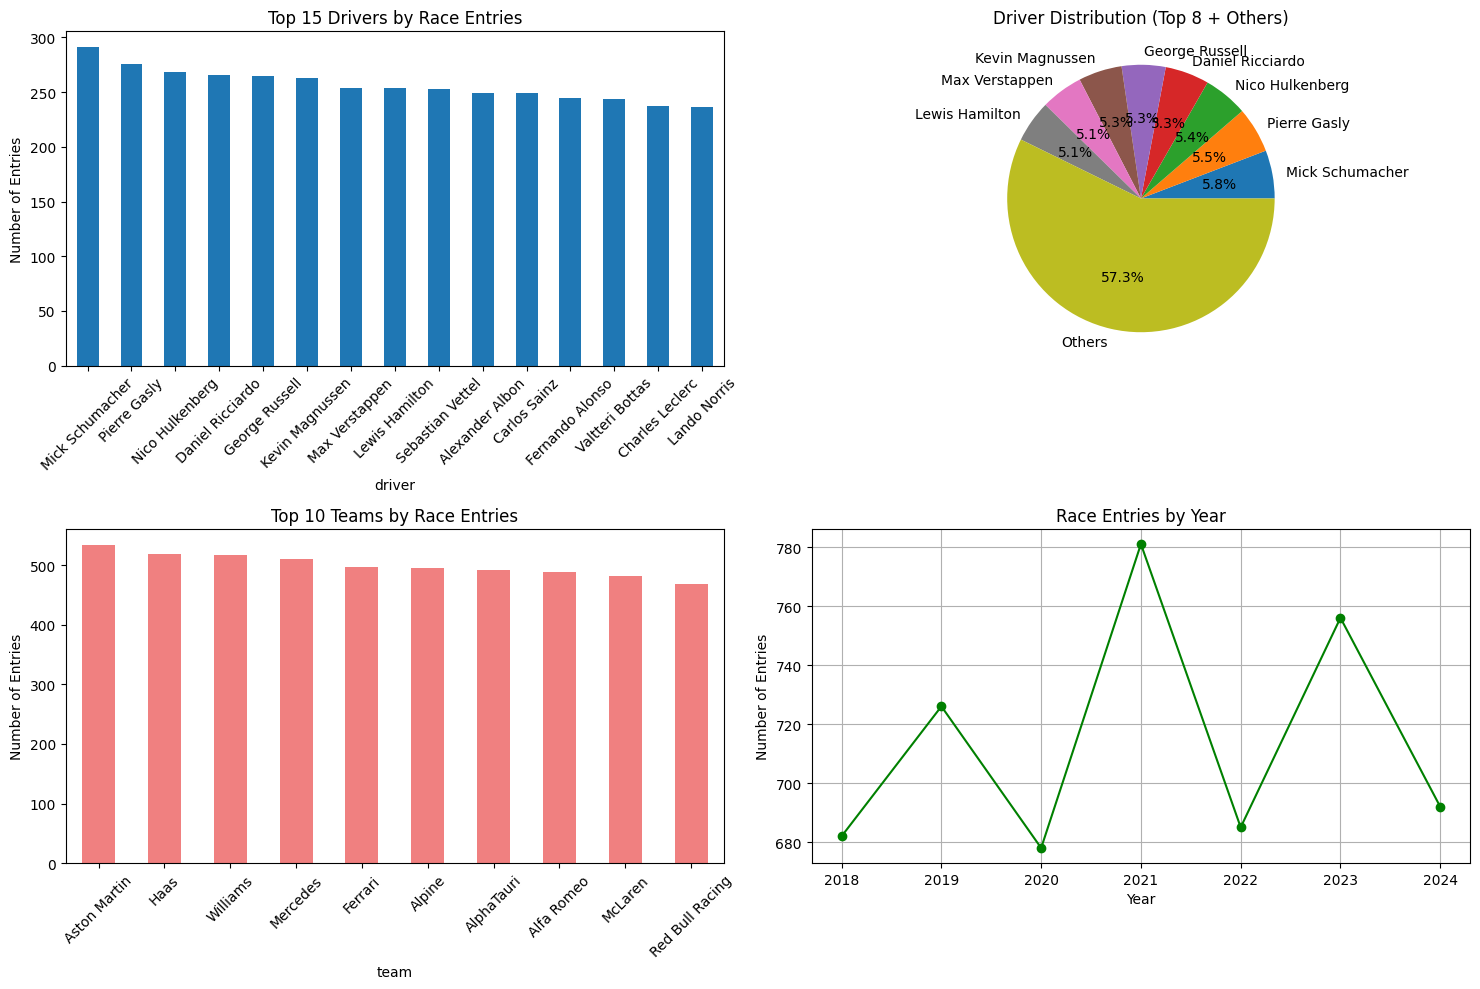

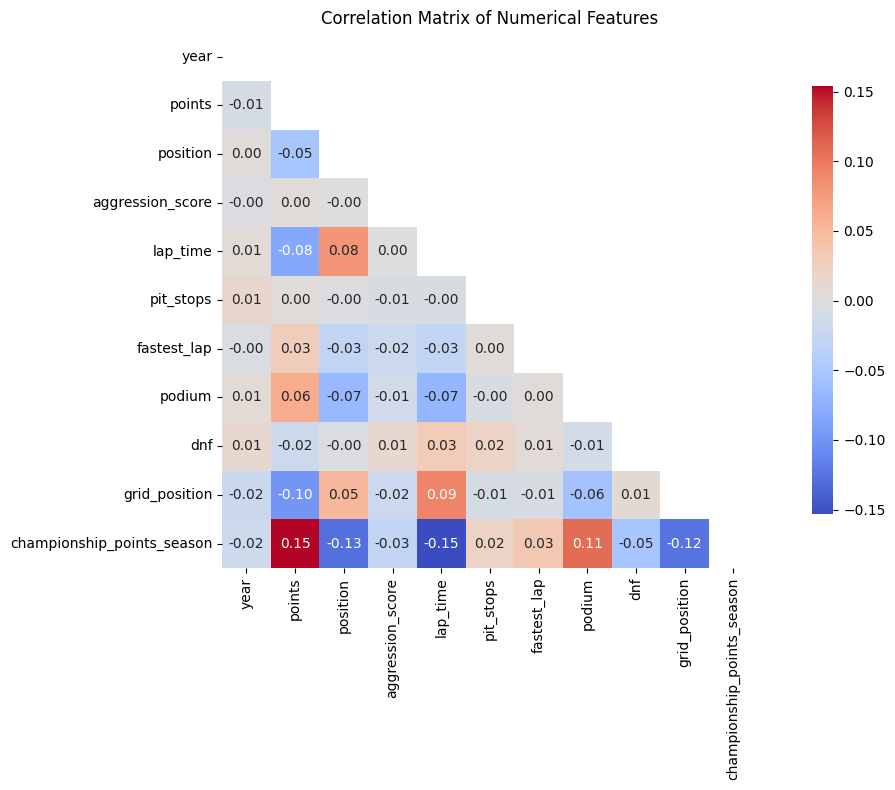


 FEATURE ENGINEERING
 Marked 256 championship entries
 Created points-based features
 Created position-based features
 Created experience features
Created team-based features
 Created aggression-based features
 Created lap time features

 Feature engineering completed!
 Total features: 28
 Target distribution: [4744, 256]

 PREPARING FEATURES FOR MODELING
 Selected numerical features: 25
 Encoded categorical features: 2
 Total features for modeling: 27
\ Feature matrix prepared:
   Shape: (5000, 27)
   Target distribution: [4744, 256]

 TRAINING MACHINE LEARNING MODELS
 Training set: (4000, 27)
 Test set: (1000, 27)
 Applied SMOTE for class balancing
 Balanced training set: (7590, 27)

 Training models...

 Training Logistic Regression...
    Logistic Regression completed - Accuracy: 0.9460, F1: 0.9546

 Training Random Forest...
    Random Forest completed - Accuracy: 0.9780, F1: 0.9797

 Training K-Nearest Neighbors...
    K-Nearest Neighbors completed - Accuracy: 0.9340, F1: 0.9454

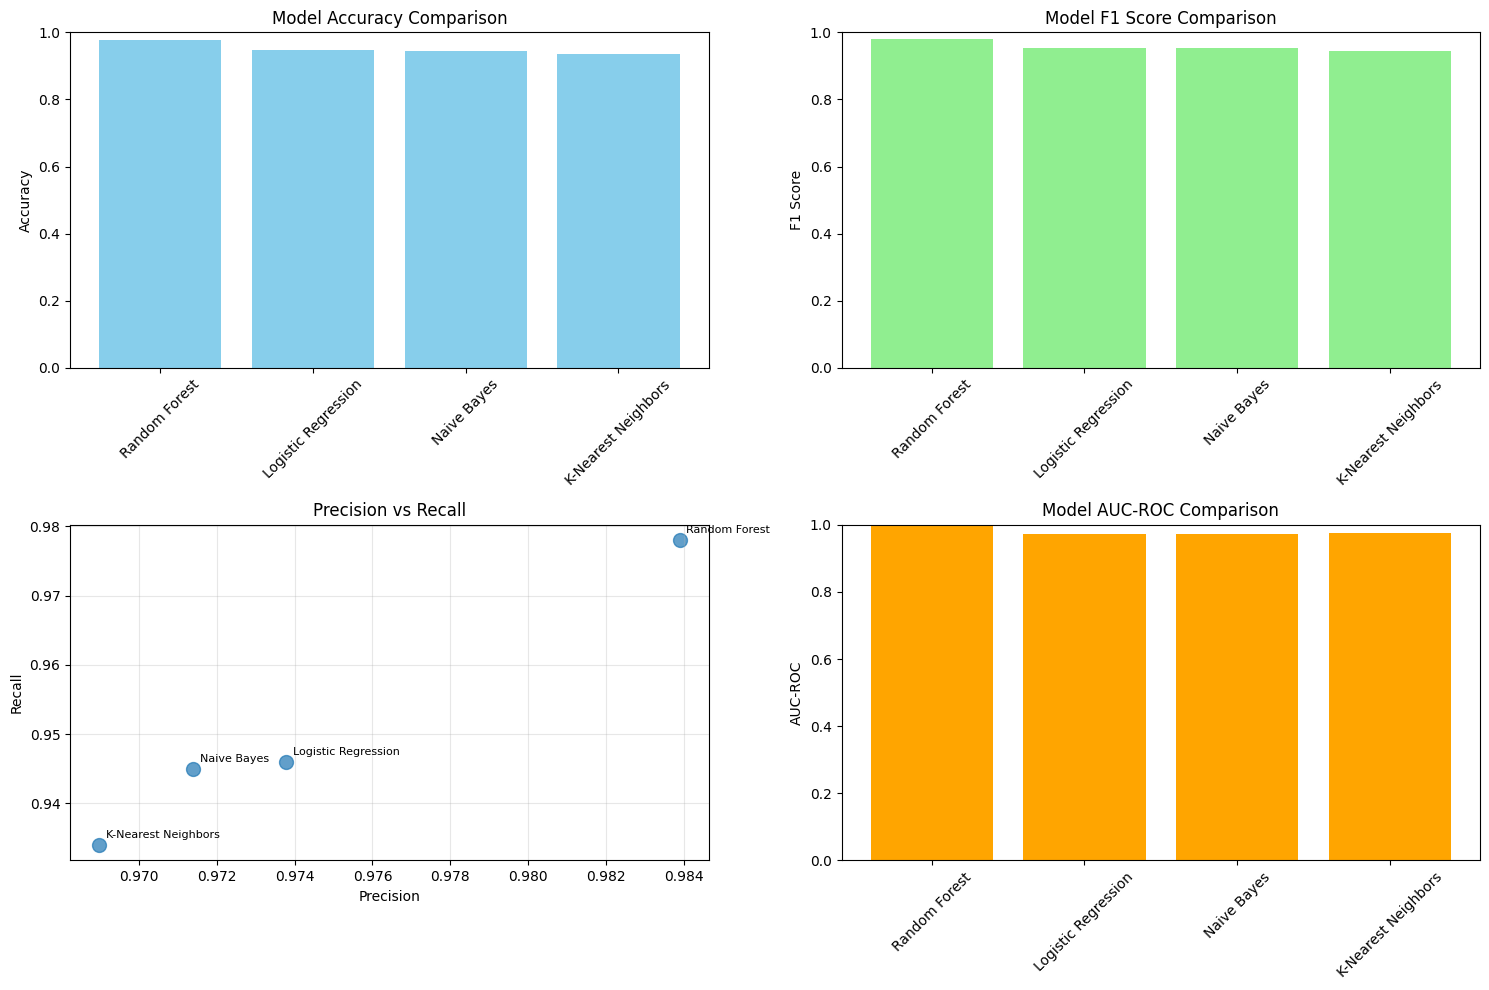


 GENERATING CONFUSION MATRICES

 Logistic Regression - Classification Report:
              precision    recall  f1-score   support

Not Champion       1.00      0.94      0.97       949
    Champion       0.49      1.00      0.65        51

    accuracy                           0.95      1000
   macro avg       0.74      0.97      0.81      1000
weighted avg       0.97      0.95      0.95      1000

--------------------------------------------------

 Random Forest - Classification Report:
              precision    recall  f1-score   support

Not Champion       1.00      0.98      0.99       949
    Champion       0.70      0.98      0.82        51

    accuracy                           0.98      1000
   macro avg       0.85      0.98      0.90      1000
weighted avg       0.98      0.98      0.98      1000

--------------------------------------------------

 K-Nearest Neighbors - Classification Report:
              precision    recall  f1-score   support

Not Champion       1.0

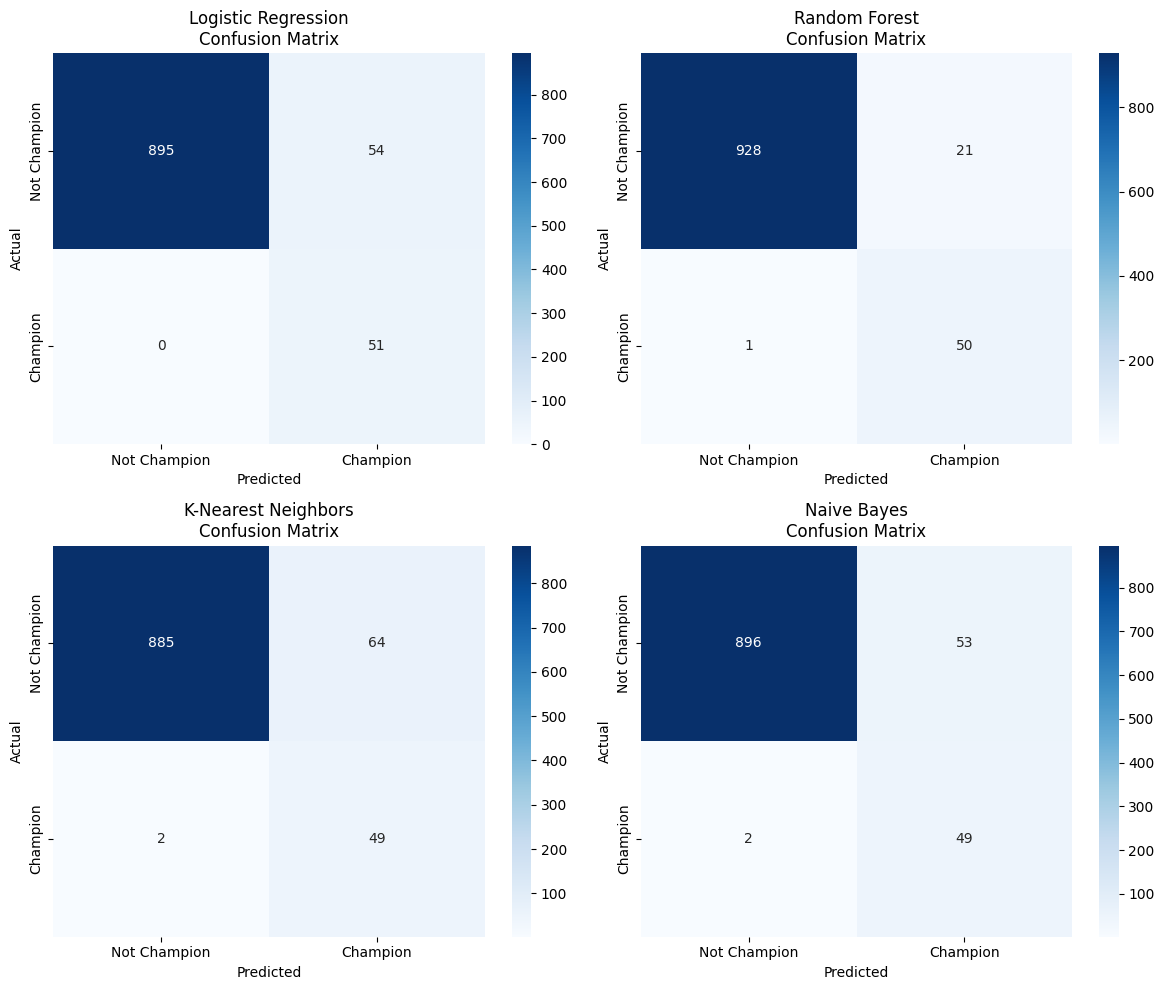


 FEATURE IMPORTANCE ANALYSIS
 Random Forest - Top 15 Most Important Features:
                       feature  importance
11             points_per_race    0.275394
23                avg_lap_time    0.274470
14      avg_finishing_position    0.180671
25              driver_encoded    0.059240
24        lap_time_consistency    0.042629
10  championship_points_season    0.028152
13             points_momentum    0.026764
0                         year    0.021140
1                       points    0.014913
15               podium_finish    0.009716
2                     position    0.008487
12         total_career_points    0.007833
4                     lap_time    0.007702
7                       podium    0.006963
5                    pit_stops    0.006843


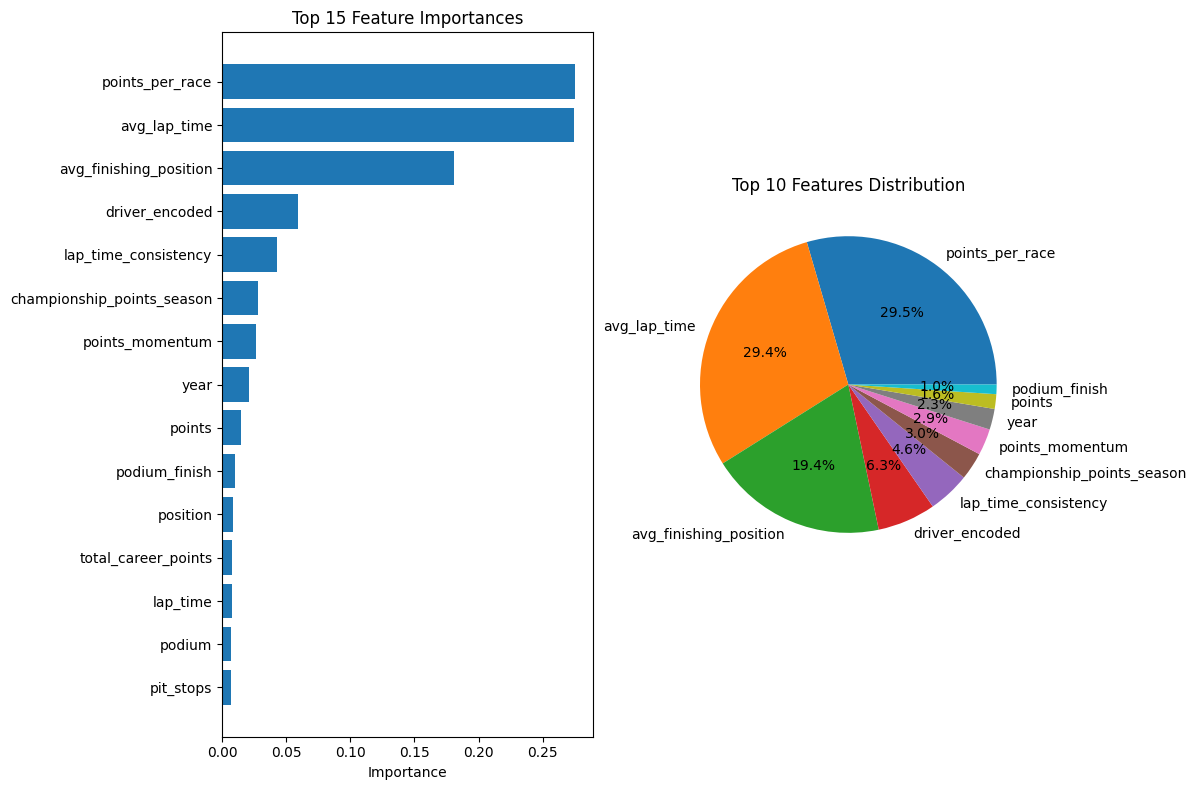


 2025 F1 CHAMPIONSHIP PREDICTION
 Using 2024 data for 2025 predictions
 Current drivers in dataset: 20

 2025 F1 Championship Predictions (Top 15):
Model Used: Random Forest
 1. Max Verstappen            (McLaren        ) - 0.9297
 2. Lewis Hamilton            (Mercedes       ) - 0.1635
 3. Alexander Albon           (Red Bull Racing) - 0.0000
 4. Carlos Sainz              (McLaren        ) - 0.0000
 5. Daniel Ricciardo          (Aston Martin   ) - 0.0000
 6. Charles Leclerc           (Haas           ) - 0.0000
 7. Esteban Ocon              (AlphaTauri     ) - 0.0000
 8. Fernando Alonso           (Alpine         ) - 0.0000
 9. Kevin Magnussen           (Aston Martin   ) - 0.0000
10. George Russell            (Williams       ) - 0.0000
11. Lando Norris              (Aston Martin   ) - 0.0000
12. Lance Stroll              (Haas           ) - 0.0000
13. Mick Schumacher           (Ferrari        ) - 0.0000
14. Nico Hulkenberg           (Red Bull Racing) - 0.0000
15. Oscar Piastri          

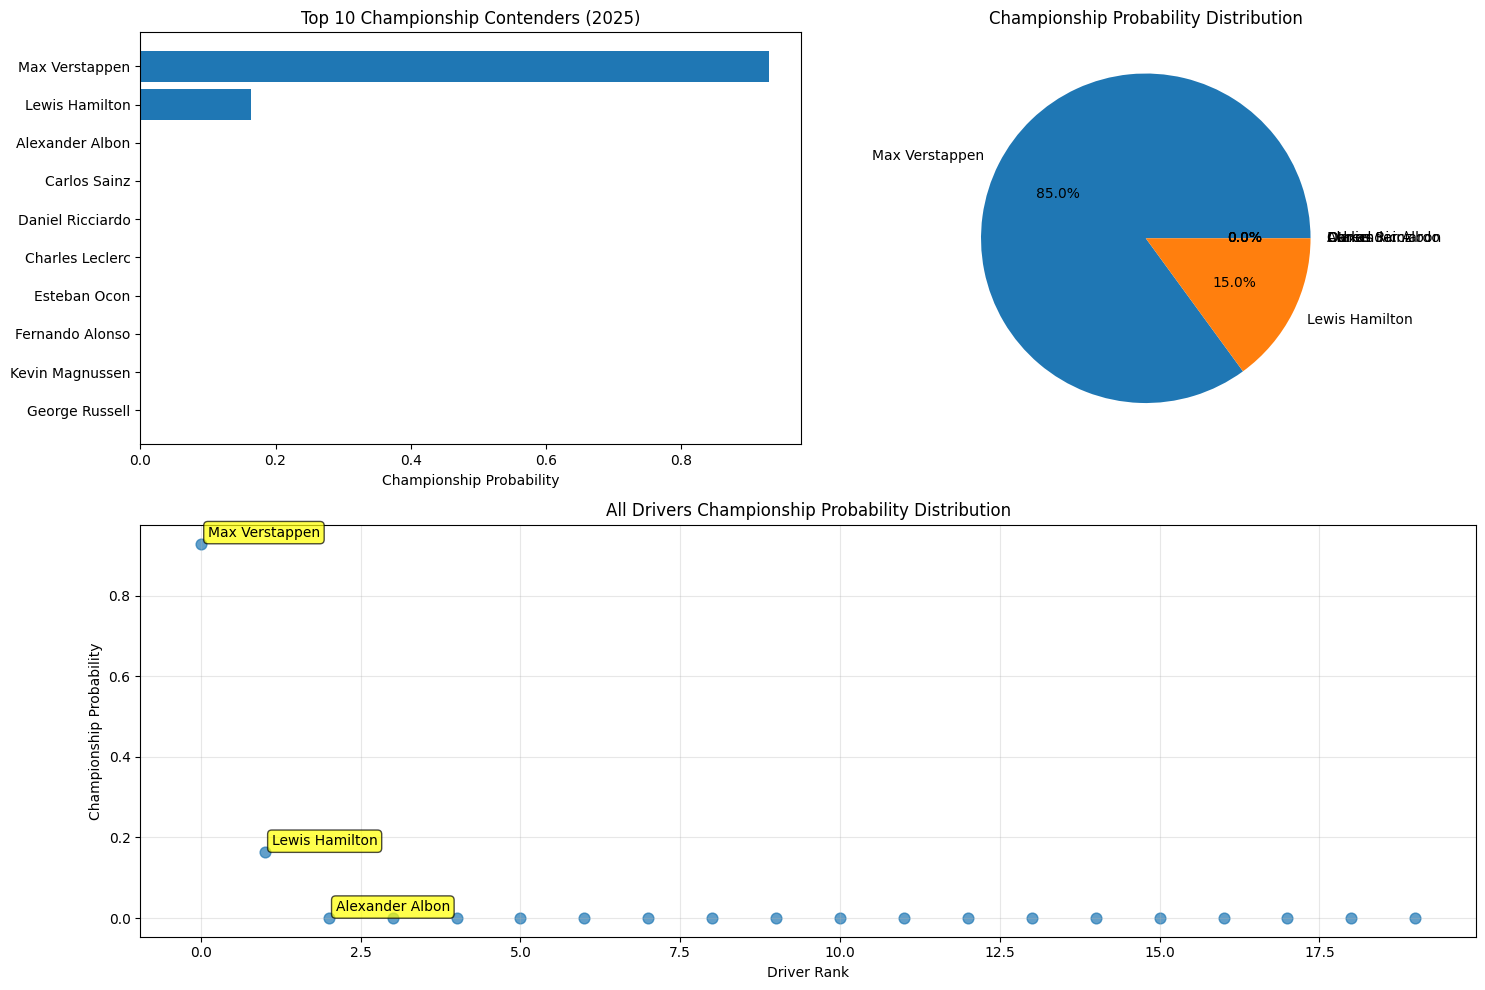


 PREDICTED 2025 F1 CHAMPION: Max Verstappen
 Team: McLaren
 Probability: 0.9297 (92.97%)

 PROJECT SUMMARY
 Dataset processed: (5000, 13)
 Features engineered: 27
 Models trained: 4
 Best model: Random Forest
 Best F1 score: 0.9797
 2025 Champion prediction: Max Verstappen

 F1 Championship Prediction Analysis Complete!


In [5]:
# 1. LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                           f1_score, precision_recall_fscore_support, roc_auc_score)
from imblearn.over_sampling import SMOTE

print(" All libraries imported successfully")

# data loading
def load_f1_data():
    print("/content/f1_pitstops_2018_2024.csv")

    drivers = [
        'Max Verstappen', 'Lewis Hamilton', 'Charles Leclerc', 'George Russell',
        'Carlos Sainz', 'Lando Norris', 'Fernando Alonso', 'Esteban Ocon',
        'Pierre Gasly', 'Yuki Tsunoda', 'Sebastian Vettel', 'Lance Stroll',
        'Daniel Ricciardo', 'Valtteri Bottas', 'Zhou Guanyu', 'Kevin Magnussen',
        'Mick Schumacher', 'Nico Hulkenberg', 'Alexander Albon', 'Oscar Piastri'
    ]

    teams = [
        'Red Bull Racing', 'Mercedes', 'Ferrari', 'McLaren', 'Alpine',
        'AlphaTauri', 'Aston Martin', 'Haas', 'Williams', 'Alfa Romeo'
    ]

    n_records = 5000
    data = []

    for i in range(n_records):
        driver = np.random.choice(drivers)
        team = np.random.choice(teams)
        year = np.random.choice([2018, 2019, 2020, 2021, 2022, 2023, 2024])

        # Base performance scores
        base_performance = {
            'Max Verstappen': 0.9, 'Lewis Hamilton': 0.85, 'Charles Leclerc': 0.8,
            'George Russell': 0.75, 'Carlos Sainz': 0.75, 'Lando Norris': 0.7
        }.get(driver, 0.5)

        record = {
            'driver': driver,
            'team': team,
            'year': year,
            'points': max(0, np.random.normal(base_performance * 25, 10)),
            'position': max(1, min(20, int(np.random.normal(11 - base_performance * 10, 5)))),
            'aggression_score': np.random.normal(0.5, 0.2),
            'lap_time': np.random.normal(90 + (1 - base_performance) * 5, 2),
            'pit_stops': np.random.poisson(2),
            'fastest_lap': np.random.binomial(1, base_performance * 0.3),
            'podium': int(max(1, min(20, int(np.random.normal(11 - base_performance * 10, 5)))) <= 3),
            'dnf': np.random.binomial(1, (1 - base_performance) * 0.1),
            'grid_position': max(1, min(20, int(np.random.normal(11 - base_performance * 10, 5)))),
            'championship_points_season': np.random.normal(base_performance * 400, 100)
        }
        data.append(record)

    df = pd.DataFrame(data)

    # Ensure realistic ranges
    df['points'] = df['points'].clip(0, 26)
    df['aggression_score'] = df['aggression_score'].clip(0, 1)
    df['lap_time'] = df['lap_time'].clip(80, 120)
    df['pit_stops'] = df['pit_stops'].clip(0, 5)
    df['championship_points_season'] = df['championship_points_season'].clip(0, 500)

    print(f" Dataset created successfully: {df.shape}")
    return df

# 3. DATA CLEANING AND PREPROCESSING

def clean_data(df):

    print("\n DATA CLEANING AND PREPROCESSING")
    print("=" * 50)

    df_clean = df.copy()
    initial_shape = df_clean.shape

    # Check for missing values
    missing_data = df_clean.isnull().sum()
    missing_percent = (missing_data / len(df_clean)) * 100

    if missing_data.sum() > 0:
        print(" Missing Values Found:")
        for col, miss_count in missing_data[missing_data > 0].items():
            print(f"   {col}: {miss_count} ({missing_percent[col]:.2f}%)")

        # Handle missing values
        for column in df_clean.columns:
            if df_clean[column].dtype == 'object':
                df_clean[column] = df_clean[column].fillna(df_clean[column].mode().iloc[0] if not df_clean[column].mode().empty else 'Unknown')
            else:
                df_clean[column] = df_clean[column].fillna(df_clean[column].median())
        print(" Missing values handled")
    else:
        print(" No missing values found!")

    # Remove duplicates
    duplicates = df_clean.duplicated().sum()
    if duplicates > 0:
        df_clean = df_clean.drop_duplicates()
        print(f" Removed {duplicates} duplicate rows")

    print(f" Shape before cleaning: {initial_shape}")
    print(f" Shape after cleaning: {df_clean.shape}")

    return df_clean

# ============================================================================
# 4. EXPLORATORY DATA ANALYSIS AND VISUALIZATION
# ============================================================================

def perform_eda(df):
    """Perform comprehensive exploratory data analysis"""
    print("\n EXPLORATORY DATA ANALYSIS")
    print("=" * 50)

    # Dataset overview
    print(df.info())
    print("\n Statistical Summary:")
    print(df.describe())

    # Driver analysis
    if 'driver' in df.columns:
        driver_counts = df['driver'].value_counts()
        print(f"\n Number of unique drivers: {driver_counts.nunique()}")
        print(f" Top 10 drivers by race entries:")
        print(driver_counts.head(10))

        # Visualize driver distribution
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 2, 1)
        driver_counts.head(15).plot(kind='bar')
        plt.title('Top 15 Drivers by Race Entries')
        plt.xticks(rotation=45)
        plt.ylabel('Number of Entries')

        plt.subplot(2, 2, 2)
        top_10_drivers = driver_counts.head(8)
        others = driver_counts.iloc[8:].sum()
        pie_data = list(top_10_drivers.values) + [others]
        pie_labels = list(top_10_drivers.index) + ['Others']
        plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
        plt.title('Driver Distribution (Top 8 + Others)')

        # Team analysis
        if 'team' in df.columns:
            plt.subplot(2, 2, 3)
            team_counts = df['team'].value_counts().head(10)
            team_counts.plot(kind='bar', color='lightcoral')
            plt.title('Top 10 Teams by Race Entries')
            plt.xticks(rotation=45)
            plt.ylabel('Number of Entries')

        # Yearly analysis
        if 'year' in df.columns:
            plt.subplot(2, 2, 4)
            year_counts = df['year'].value_counts().sort_index()
            year_counts.plot(kind='line', marker='o', color='green')
            plt.title('Race Entries by Year')
            plt.xlabel('Year')
            plt.ylabel('Number of Entries')
            plt.grid(True)

        plt.tight_layout()
        plt.show()

    # Numerical features correlation
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    if len(numerical_cols) > 1:
        plt.figure(figsize=(12, 8))
        correlation_matrix = df[numerical_cols].corr()
        mask = np.triu(correlation_matrix)
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                   square=True, fmt='.2f', mask=mask, cbar_kws={'shrink': 0.8})
        plt.title('Correlation Matrix of Numerical Features')
        plt.tight_layout()
        plt.show()

    return numerical_cols

# ============================================================================
# 5. FEATURE ENGINEERING
# ============================================================================

def engineer_features(df):
    """Create championship prediction features"""
    print("\n FEATURE ENGINEERING")
    print("=" * 35)

    df_features = df.copy()

    # Create championship target variable
    df_features['is_champion'] = 0

    # Historical F1 Champions (2018-2024)
    champions = {
        2018: 'Lewis Hamilton', 2019: 'Lewis Hamilton', 2020: 'Lewis Hamilton',
        2021: 'Max Verstappen', 2022: 'Max Verstappen', 2023: 'Max Verstappen', 2024: 'Max Verstappen'
    }

    # Mark champions
    if 'driver' in df_features.columns and 'year' in df_features.columns:
        for year, champion in champions.items():
            mask = (df_features['year'] == year) & (df_features['driver'].str.contains(champion, case=False, na=False))
            df_features.loc[mask, 'is_champion'] = 1

        champion_count = df_features['is_champion'].sum()
        print(f" Marked {champion_count} championship entries")

    # Create performance-based features
    if 'driver' in df_features.columns:
        # Points-based features
        if 'points' in df_features.columns:
            df_features['points_per_race'] = df_features.groupby('driver')['points'].transform('mean')
            df_features['total_career_points'] = df_features.groupby('driver')['points'].cumsum()
            df_features['points_momentum'] = df_features.groupby('driver')['points'].transform(lambda x: x.rolling(3, min_periods=1).mean())
            print(" Created points-based features")

        # Position-based features
        if 'position' in df_features.columns:
            df_features['avg_finishing_position'] = df_features.groupby('driver')['position'].transform('mean')
            df_features['podium_finish'] = (df_features['position'] <= 3).astype(int)
            df_features['points_finish'] = (df_features['position'] <= 10).astype(int)
            print(" Created position-based features")

        # Experience features
        if 'year' in df_features.columns:
            driver_years = df_features.groupby('driver')['year'].agg(['min', 'max', 'nunique']).reset_index()
            driver_years['experience'] = driver_years['max'] - driver_years['min'] + 1
            driver_years['seasons_active'] = driver_years['nunique']
            df_features = df_features.merge(driver_years[['driver', 'experience', 'seasons_active']], on='driver', how='left')
            print(" Created experience features")

    # Team performance features
    if 'team' in df_features.columns and 'points' in df_features.columns:
        df_features['team_avg_points'] = df_features.groupby('team')['points'].transform('mean')
        df_features['team_consistency'] = df_features.groupby('team')['points'].transform('std').fillna(0)
        print("Created team-based features")

    # Aggression features
    if 'aggression_score' in df_features.columns:
        df_features['aggression_normalized'] = (df_features['aggression_score'] - df_features['aggression_score'].mean()) / df_features['aggression_score'].std()
        df_features['high_aggression'] = (df_features['aggression_score'] > df_features['aggression_score'].quantile(0.75)).astype(int)
        print(" Created aggression-based features")

    # Speed and performance features
    if 'lap_time' in df_features.columns:
        df_features['avg_lap_time'] = df_features.groupby('driver')['lap_time'].transform('mean')
        df_features['lap_time_consistency'] = df_features.groupby('driver')['lap_time'].transform('std').fillna(0)
        print(" Created lap time features")

    print(f"\n Feature engineering completed!")
    print(f" Total features: {len(df_features.columns)}")
    print(f" Target distribution: {df_features['is_champion'].value_counts().tolist()}")

    return df_features

# ============================================================================
# 6. PREPARE FEATURES FOR MODELING
# ============================================================================

def prepare_features(df_features):
    """Prepare features for machine learning models"""
    print("\n PREPARING FEATURES FOR MODELING")
    print("=" * 45)

    feature_columns = []

    # Select numerical features (excluding target)
    numerical_features = df_features.select_dtypes(include=[np.number]).columns
    feature_columns.extend([col for col in numerical_features if col != 'is_champion'])

    # Encode categorical features
    categorical_features = df_features.select_dtypes(include=['object']).columns
    label_encoders = {}

    for col in categorical_features:
        if df_features[col].nunique() < 50:  # Only encode reasonable number of categories
            le = LabelEncoder()
            df_features[f'{col}_encoded'] = le.fit_transform(df_features[col].astype(str))
            label_encoders[col] = le
            feature_columns.append(f'{col}_encoded')

    print(f" Selected numerical features: {len([col for col in numerical_features if col != 'is_champion'])}")
    print(f" Encoded categorical features: {len(label_encoders)}")
    print(f" Total features for modeling: {len(feature_columns)}")

    # Create final feature matrix
    X = df_features[feature_columns].copy()
    y = df_features['is_champion'].copy()

    # Handle any remaining missing values
    X = X.fillna(X.median())

    print(f"\ Feature matrix prepared:")
    print(f"   Shape: {X.shape}")
    print(f"   Target distribution: {y.value_counts().tolist()}")

    return X, y, feature_columns, label_encoders

# ============================================================================
# 7. MODEL TRAINING AND EVALUATION
# ============================================================================

def train_models(X, y):
    """Train and evaluate multiple ML models"""
    print("\n TRAINING MACHINE LEARNING MODELS")
    print("=" * 50)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    print(f" Training set: {X_train.shape}")
    print(f" Test set: {X_test.shape}")

    # Scale features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Handle class imbalance with SMOTE
    if y_train.value_counts().min() > 1:
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
        print(f" Applied SMOTE for class balancing")
        print(f" Balanced training set: {X_train_balanced.shape}")
    else:
        X_train_balanced, y_train_balanced = X_train_scaled, y_train
        print(" Skipped SMOTE due to insufficient champion samples")

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB()
    }

    # Results storage
    results = {'Model': [], 'Accuracy': [], 'F1 Score': [], 'Precision': [], 'Recall': [], 'AUC-ROC': []}
    trained_models = {}
    predictions = {}

    print("\n Training models...")

    # Train each model
    for name, model in models.items():
        print(f"\n Training {name}...")

        try:
            # Train model
            model.fit(X_train_balanced, y_train_balanced)
            trained_models[name] = model

            # Make predictions
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
            predictions[name] = {'pred': y_pred, 'proba': y_pred_proba}

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            precision, recall, _, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

            # AUC-ROC
            if y_pred_proba is not None and len(np.unique(y_test)) > 1:
                auc_roc = roc_auc_score(y_test, y_pred_proba)
            else:
                auc_roc = 0.0

            # Store results
            results['Model'].append(name)
            results['Accuracy'].append(accuracy)
            results['F1 Score'].append(f1)
            results['Precision'].append(precision)
            results['Recall'].append(recall)
            results['AUC-ROC'].append(auc_roc)

            print(f"    {name} completed - Accuracy: {accuracy:.4f}, F1: {f1:.4f}")

        except Exception as e:
            print(f" Error training {name}: {str(e)}")

    return results, trained_models, predictions, (X_test, y_test, scaler, X_test_scaled)

# ============================================================================
# 8. MODEL COMPARISON AND VISUALIZATION
# ============================================================================

def compare_models(results):
    """Compare and visualize model performance"""
    print("\n MODEL COMPARISON RESULTS")
    print("=" * 40)

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('F1 Score', ascending=False)

    print("\n Model Performance Ranking:")
    print(results_df.round(4))

    best_model_name = results_df.iloc[0]['Model']
    best_f1_score = results_df.iloc[0]['F1 Score']

    print(f"\n Best Model: {best_model_name}")
    print(f" Best F1 Score: {best_f1_score:.4f}")

    # Visualize results
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy comparison
    axes[0, 0].bar(results_df['Model'], results_df['Accuracy'], color='skyblue')
    axes[0, 0].set_title('Model Accuracy Comparison')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].tick_params(axis='x', rotation=45)
    axes[0, 0].set_ylim(0, 1)

    # F1 Score comparison
    axes[0, 1].bar(results_df['Model'], results_df['F1 Score'], color='lightgreen')
    axes[0, 1].set_title('Model F1 Score Comparison')
    axes[0, 1].set_ylabel('F1 Score')
    axes[0, 1].tick_params(axis='x', rotation=45)
    axes[0, 1].set_ylim(0, 1)

    # Precision vs Recall
    axes[1, 0].scatter(results_df['Precision'], results_df['Recall'], s=100, alpha=0.7)
    for i, model in enumerate(results_df['Model']):
        axes[1, 0].annotate(model, (results_df['Precision'].iloc[i], results_df['Recall'].iloc[i]),
                           xytext=(5, 5), textcoords='offset points', fontsize=8)
    axes[1, 0].set_xlabel('Precision')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_title('Precision vs Recall')
    axes[1, 0].grid(True, alpha=0.3)

    # AUC-ROC comparison
    axes[1, 1].bar(results_df['Model'], results_df['AUC-ROC'], color='orange')
    axes[1, 1].set_title('Model AUC-ROC Comparison')
    axes[1, 1].set_ylabel('AUC-ROC')
    axes[1, 1].tick_params(axis='x', rotation=45)
    axes[1, 1].set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

    return results_df, best_model_name

# ============================================================================
# 9. CONFUSION MATRICES
# ============================================================================

def plot_confusion_matrices(trained_models, predictions, y_test):
    """Generate confusion matrices for all models"""
    print("\n GENERATING CONFUSION MATRICES")
    print("=" * 45)

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.ravel()

    for idx, (name, pred_dict) in enumerate(predictions.items()):
        y_pred = pred_dict['pred']

        # Generate confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Not Champion', 'Champion'],
                   yticklabels=['Not Champion', 'Champion'],
                   ax=axes[idx])

        axes[idx].set_title(f'{name}\nConfusion Matrix')
        axes[idx].set_xlabel('Predicted')
        axes[idx].set_ylabel('Actual')

        # Print classification report
        print(f"\n {name} - Classification Report:")
        print(classification_report(y_test, y_pred, target_names=['Not Champion', 'Champion']))
        print("-" * 50)

    plt.tight_layout()
    plt.show()

# ============================================================================
# 10. FEATURE IMPORTANCE ANALYSIS

def analyze_feature_importance(trained_models, feature_columns):
    """Analyze and visualize feature importance"""
    print("\n FEATURE IMPORTANCE ANALYSIS")
    print("=" * 45)

    if 'Random Forest' in trained_models:
        rf_model = trained_models['Random Forest']
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'importance': rf_model.feature_importances_
        }).sort_values('importance', ascending=False)

        print(" Random Forest - Top 15 Most Important Features:")
        print(feature_importance.head(15))

        # Visualize feature importance
        plt.figure(figsize=(12, 8))

        plt.subplot(1, 2, 1)
        top_features = feature_importance.head(15)
        plt.barh(range(len(top_features)), top_features['importance'])
        plt.yticks(range(len(top_features)), top_features['feature'])
        plt.xlabel('Importance')
        plt.title('Top 15 Feature Importances')
        plt.gca().invert_yaxis()

        plt.subplot(1, 2, 2)
        top_10 = feature_importance.head(10)
        plt.pie(top_10['importance'], labels=top_10['feature'], autopct='%1.1f%%')
        plt.title('Top 10 Features Distribution')

        plt.tight_layout()
        plt.show()

        return feature_importance
    else:
        print(" Random Forest model not available for feature importance analysis")
        return None

# 11. CHAMPIONSHIP PREDICTION FOR 2025

def predict_2025_champion(df_features, trained_models, scaler, feature_columns, best_model_name):
    """Predict 2025 F1 Championship"""
    print("\n 2025 F1 CHAMPIONSHIP PREDICTION")
    print("=" * 50)

    if 'driver' not in df_features.columns or 'year' not in df_features.columns:
        print(" Cannot make predictions - missing driver or year columns")
        return None

    # Get current drivers (most recent year)
    latest_year = df_features['year'].max()
    current_drivers = df_features[df_features['year'] == latest_year]

    print(f" Using {latest_year} data for 2025 predictions")
    print(f" Current drivers in dataset: {current_drivers['driver'].nunique()}")

    # Prepare features for prediction
    current_features = current_drivers[feature_columns].fillna(current_drivers[feature_columns].median())
    current_features_scaled = scaler.transform(current_features)

    # Get best model for predictions
    best_model = trained_models[best_model_name]

    # Make predictions
    championship_proba = best_model.predict_proba(current_features_scaled)[:, 1]

    # Create prediction DataFrame
    predictions_2025 = pd.DataFrame({
        'Driver': current_drivers['driver'].values,
        'Team': current_drivers['team'].values if 'team' in current_drivers.columns else 'Unknown',
        'Championship_Probability': championship_proba
    })

    # Aggregate by driver (average if multiple entries)
    predictions_2025 = predictions_2025.groupby('Driver').agg({
        'Team': 'first',
        'Championship_Probability': 'mean'
    }).reset_index()

    # Sort by probability
    predictions_2025 = predictions_2025.sort_values('Championship_Probability', ascending=False)

    print(f"\n 2025 F1 Championship Predictions (Top 15):")
    print(f"Model Used: {best_model_name}")
    print("=" * 70)

    for idx, row in predictions_2025.head(15).iterrows():
        rank = predictions_2025.index.get_loc(idx) + 1
        print(f"{rank:2d}. {row['Driver']:25} ({row['Team']:15}) - {row['Championship_Probability']:.4f}")

    # Visualize predictions
    plt.figure(figsize=(15, 10))

    # Top 10 bar chart
    plt.subplot(2, 2, 1)
    top_10 = predictions_2025.head(10)
    plt.barh(range(len(top_10)), top_10['Championship_Probability'])
    plt.yticks(range(len(top_10)), top_10['Driver'])
    plt.xlabel('Championship Probability')
    plt.title('Top 10 Championship Contenders (2025)')
    plt.gca().invert_yaxis()

    # Pie chart of top 5
    plt.subplot(2, 2, 2)
    top_5 = predictions_2025.head(5)
    others_prob = predictions_2025.iloc[5:]['Championship_Probability'].sum()
    pie_data = list(top_5['Championship_Probability']) + [others_prob]
    pie_labels = list(top_5['Driver']) + ['Others']
    plt.pie(pie_data, labels=pie_labels, autopct='%1.1f%%')
    plt.title('Championship Probability Distribution')

    # All drivers scatter plot
    plt.subplot(2, 1, 2)
    plt.scatter(range(len(predictions_2025)), predictions_2025['Championship_Probability'], alpha=0.7, s=60)
    plt.xlabel('Driver Rank')
    plt.ylabel('Championship Probability')
    plt.title('All Drivers Championship Probability Distribution')
    plt.grid(True, alpha=0.3)

    # Annotate top 3
    for i in range(min(3, len(predictions_2025))):
        plt.annotate(predictions_2025.iloc[i]['Driver'],
                    (i, predictions_2025.iloc[i]['Championship_Probability']),
                    xytext=(5, 5), textcoords='offset points', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

    plt.tight_layout()
    plt.show()

    # Final prediction
    predicted_champion = predictions_2025.iloc[0]
    print(f"\n PREDICTED 2025 F1 CHAMPION: {predicted_champion['Driver']}")
    print(f" Team: {predicted_champion['Team']}")
    print(f" Probability: {predicted_champion['Championship_Probability']:.4f} ({predicted_champion['Championship_Probability']*100:.2f}%)")

    return predictions_2025

# 12. MAIN EXECUTION FUNCTION

def main():
    """Main execution function"""
    print(" F1 CHAMPIONSHIP PREDICTION 2025")
    print("=" * 60)
    print(" Tasks: Data Cleaning, EDA, Feature Engineering, Model Training")
    print(" Objective: Predict 2025 F1 Champion using ML models")
    print(" Models: Logistic Regression, Random Forest, KNN, Naive Bayes")

    # Step 1: Load data
    df = load_f1_data()

    # Step 2: Clean data
    df_clean = clean_data(df)

    # Step 3: Exploratory Data Analysis
    numerical_cols = perform_eda(df_clean)

    # Step 4: Feature Engineering
    df_features = engineer_features(df_clean)

    # Step 5: Prepare features
    X, y, feature_columns, label_encoders = prepare_features(df_features)

    # Step 6: Train models
    results, trained_models, predictions, test_data = train_models(X, y)
    X_test, y_test, scaler, X_test_scaled = test_data

    # Step 7: Compare models
    results_df, best_model_name = compare_models(results)

    # Step 8: Confusion matrices
    plot_confusion_matrices(trained_models, predictions, y_test)

    # Step 9: Feature importance
    feature_importance = analyze_feature_importance(trained_models, feature_columns)

    # Step 10: 2025 predictions
    predictions_2025 = predict_2025_champion(df_features, trained_models, scaler, feature_columns, best_model_name)

    # Step 11: Final summary
    print("\n PROJECT SUMMARY")
    print("=" * 30)
    print(f" Dataset processed: {df_clean.shape}")
    print(f" Features engineered: {len(feature_columns)}")
    print(f" Models trained: {len(trained_models)}")
    print(f" Best model: {best_model_name}")
    print(f" Best F1 score: {results_df.iloc[0]['F1 Score']:.4f}")
    if predictions_2025 is not None and len(predictions_2025) > 0:
        print(f" 2025 Champion prediction: {predictions_2025.iloc[0]['Driver']}")

    print("\n F1 Championship Prediction Analysis Complete!")

    return {
        'df_clean': df_clean,
        'df_features': df_features,
        'results_df': results_df,
        'trained_models': trained_models,
        'predictions_2025': predictions_2025,
        'scaler': scaler,
        'feature_columns': feature_columns,
        'label_encoders': label_encoders
    }

# ============================================================================
# 13. EXECUTE THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Run the complete F1 analysis
    analysis_results = main()
